# Titanic: Machine Learning from Disaster

<p> Desafio do Titanic é uma das competições mais famosas, e é promovida pelo site kaggle.com. Tamanha popularidade desta competição fez com que ela fosse considerada como sendo um Hello, World! para o universo fantástico do Data Science (Ciência de Dados).
    Com certeza, a maioria de vocês conhece a história por trás do naufrágio deste que seria o navio mais moderno do mundo para a época. Apesar da tecnologia disponível, após colidir com um iceberg em 15 de abril de 1912, seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.
    Como principal fator contribuinte, logo se descobriu que não havia botes salva-vidas suficientes para toda a tripulação e passageiros.
    O modelo deste projeto analisa, com os dados disponiveis pelo site Kaggle, a média real que um passageiro tinha para sobreviver devido as condições que se encontrava o naufrágio</p>

# Checklist¶

* 1) Definição do Problema
* 2) Obtenção dos Dados
* 3) Exploração dos Dados
* 4) Preparação dos Dados
* 5) Construção do Modelo
* 6) Avaliação

# 1. Definição do Problema

<p> A construção do Titanic levou cerca de 2 anos e custou 7,5 milhões de dólares (valores da época). Com 269 metros de comprimento, 28 metros de largura e 53 metros de altura, operava com uma tripulação de 892 pessoas e poderia levar até 2435 passageiros (espalhados pelas três classes disponíveis).</p>
   <p> Pensado para ser o mais seguro e luxuoso navio da época, foi lançado ao mar em 1911, ganhando fama de ser "inafundável".</p>
   <p> O naufrágio do Titanic teve como fatores contribuintes causas naturais (como o clima) e causas humanas (negligência e excesso de confiança). </p>
   <p> Independente das causas, o fato é que seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.</p>
   <p> Embora aqueles que escaparam com vida tiveram sua boa dose de sorte, alguns grupos de pessoas eram mais propensos a escaparem da morte do que outros. Por exemplo, mulheres, crianças e passageiros da 1ª Classe. Assim, nota-se que existe algum padrão que pode ser extraído dos dados brutos.</p>

# 2. Obtendo os dados

> Preparando os pacotes necessários

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#biblioteca de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

 

In [2]:
# Analisando as variaveis e entradas do treino
print(f"Variavéis: {treino.shape[1]}")
print(f"Entradas: {treino.shape[0]}")

Variavéis: 12
Entradas: 891


# 3. Exploração dos Dados

>  Dicionário dos Dados

> 1. <b>PassengerId:</b> Número de identificação do passageiro;
> 2. <b>Survived:</b> Informa se o passageiro sobreviveu ao desastre:
    > <b> 0 =</b> NÃO
    > <b> 1 =</b> SIM
    
> 3. <b>Pclass:</b> Classe do Bilhete:
    > <b>1 =</b> 1º Classe;
    > <b>2 =</b> 2º Classe;
    > <b>3 =</b> 3º Classe;
    
> 4. <b>Name:</b> Nome do passageiro;
> 5. <b>Sex:</b> Sexo do passageiro;
> 6. <b>Age:</b> Idade do passageiro;
> 7. <b>SibSp:</b> Quantidade de cônjugues e irmãos a bordo;
> 8. <b>Parch:</b> Quantidade de pais e filhos a bordo;
> 9. <b>Ticket:</b> Número da passagem;
> 10. <b>Fare:</b> Preço da passagem;
> 11. <b>Cabin:</b> Número da cabine do passageiro;
> 12. <b>Embarked:</b> Porto na qual o passageiro embarcou.
    > <b>C =</b> Cherbourg
    > <b>Q =</b> Queenstown
    > <b>S =</b> Southampton
    

In [3]:
#vendo todas as colunas
treino.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#trocando os nomes das colunas
treino.columns = ['IDpassageiro', 'Sobrevivente', 'Classe', 'Nome', 'Sexo', 'Idade', 'Conjugue', 'Familia', 'Bilhete', 'Preço', 'Cabine', 'Porto']


In [5]:
teste.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
teste.columns = ['IDpassageiro', 'Classe', 'Nome', 'Sexo', 'Idade', 'Conjugue', 'Familia', 'Bilhete', 'Preço', 'Cabine', 'Porto']

In [7]:
# identificar o tipo de cada variável
display(treino.dtypes)
display(treino.head())

IDpassageiro      int64
Sobrevivente      int64
Classe            int64
Nome             object
Sexo             object
Idade           float64
Conjugue          int64
Familia           int64
Bilhete          object
Preço           float64
Cabine           object
Porto            object
dtype: object

,IDpassageiro,Sobrevivente,Classe,Nome,Sexo,Idade,Conjugue,Familia,Bilhete,Preço,Cabine,Porto
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> Primeiro problema observado: CABINE
> A informação sobre a Cabin é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna IDADE não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque (Embarked) possui apenas 2% de informações faltantes.

In [8]:
# ver a porcentagem valores faltantes
(treino.isnull().sum() / treino.shape[0]).sort_values(ascending=False)

Cabine          0.771044
Idade           0.198653
Porto           0.002245
Preço           0.000000
Bilhete         0.000000
Familia         0.000000
Conjugue        0.000000
Sexo            0.000000
Nome            0.000000
Classe          0.000000
Sobrevivente    0.000000
IDpassageiro    0.000000
dtype: float64

In [9]:
#analisando a estatistica desses dados
treino.describe()

,IDpassageiro,Sobrevivente,Classe,Idade,Conjugue,Familia,Preço
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'IDpassageiro'}>,
        <AxesSubplot:title={'center':'Sobrevivente'}>,
        <AxesSubplot:title={'center':'Classe'}>],
       [<AxesSubplot:title={'center':'Idade'}>,
        <AxesSubplot:title={'center':'Conjugue'}>,
        <AxesSubplot:title={'center':'Familia'}>],
       [<AxesSubplot:title={'center':'Preço'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

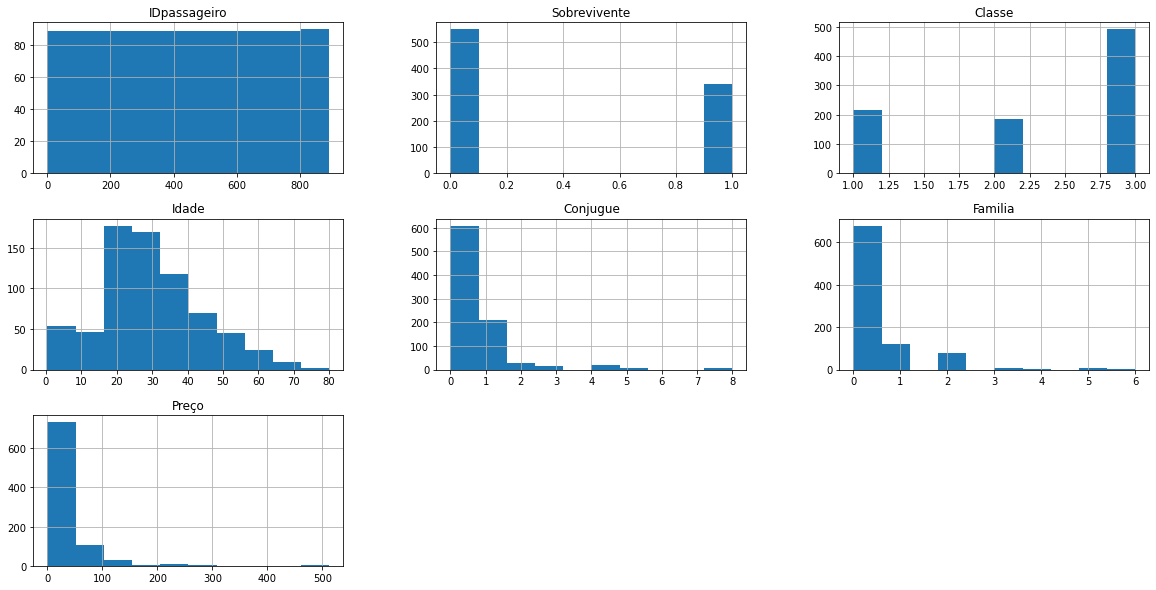

In [10]:
#vendo o historiograma dos dados
treino.hist(figsize=(20,10))

# Analisando as probabilidades

In [11]:
treino.columns

Index(['IDpassageiro', 'Sobrevivente', 'Classe', 'Nome', 'Sexo', 'Idade',
       'Conjugue', 'Familia', 'Bilhete', 'Preço', 'Cabine', 'Porto'],
      dtype='object')

In [12]:
#probabilidade por sexo.
treino[['Sexo', 'Sobrevivente']].groupby(['Sexo']).mean().round(2)

,Sobrevivente
Sexo,
female,0.74
male,0.19


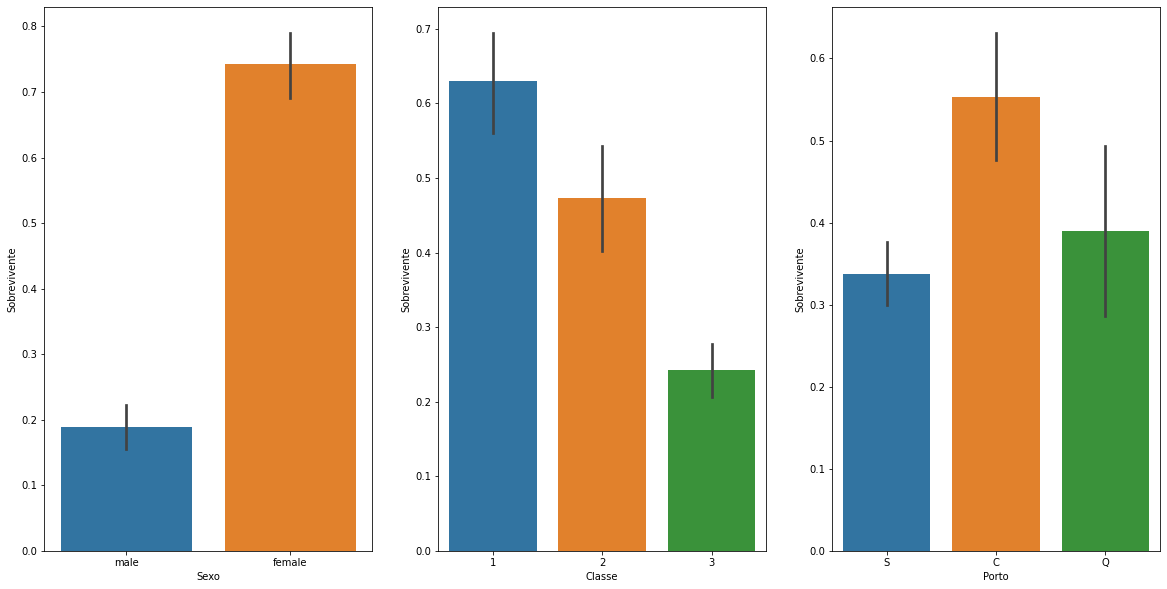

In [13]:
# Plotar os gráficos para Sobrevivente vs. Sexo, Classe e Porto
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(20,10))

sns.barplot(x='Sexo', y='Sobrevivente', data=treino, ax=axis1)
sns.barplot(x='Classe', y='Sobrevivente', data=treino, ax=axis2)
sns.barplot(x='Porto', y='Sobrevivente', data=treino, ax=axis3);

> Na análise acima, podemos observar que as chances de sobreviver foram maiores para as mulheres do que para os homens
> e destas mulheres, as pertentes a classe 2 e que embarcaram de Cherbourg

C:\Users\batestin1\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\batestin1\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


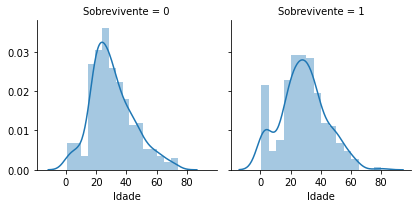

In [14]:
# ver influência da idade na probabilidade de sobrevivência
idadeSobrevivente = sns.FacetGrid(treino, col='Sobrevivente')
idadeSobrevivente.map(sns.distplot, 'Idade')

> A idade aproximada de sobreviventes eram entre 20 a 30 anos, a partir dos 40 o grafico claramente diminui

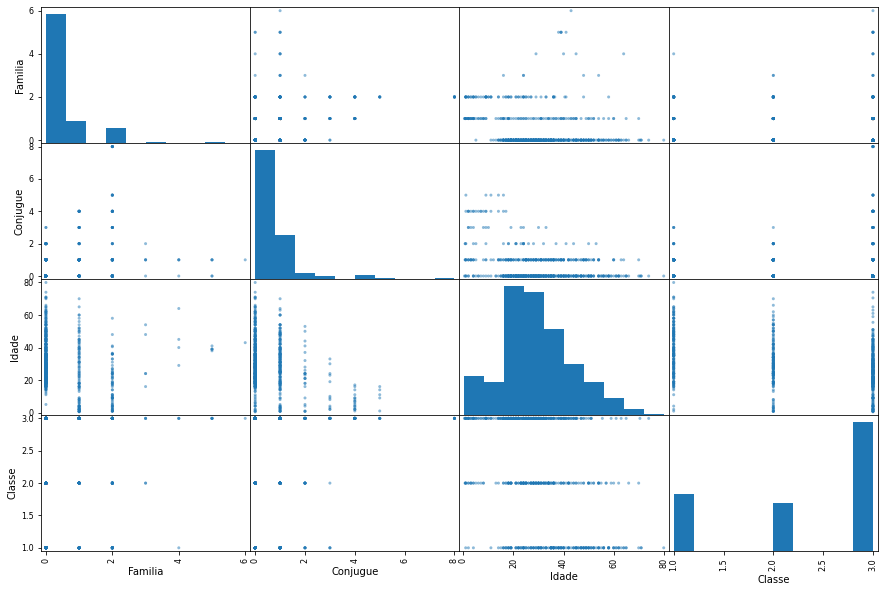

In [15]:
# plotar uma scatter matrix
columns=['Familia', 'Conjugue', 'Idade', 'Classe']
pd.plotting.scatter_matrix(treino[columns], figsize=(15, 10));

> No grafico acima, podemos observar uma matriz de dispersão das variaveis
> 1. Classe
> 2. Idade
> 3. Conjugue
> 4. Familia

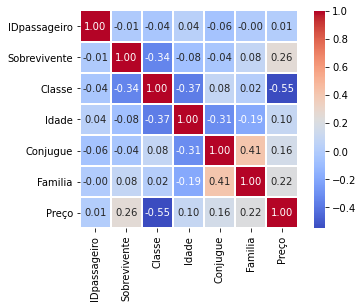

In [16]:
# plotar o heatmap para as variáveis numéricas
sns.heatmap(treino.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.5,
            vmax=1.0, square=True, linecolor='white', annot=True);

> Pouca gente sabe que o método describe() pode ser usado também para ver algo sobre a estatística descritiva em colunas que não são números. Para isso, é só passar o argumento include=['O'].

In [17]:
treino.describe(include=['O'])

,Nome,Sexo,Bilhete,Cabine,Porto
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Leinonen, Mr. Antti Gustaf",male,347082,B96 B98,S
freq,1,577,7,4,644


> <b> Os dados nos apresenta as seguintes inferências:</b>
> * Os valores para <b>Nome</b> são únicos, um para cada pessoa;
> * Não há <i> missing</i> para os valores <b> Nome </b> e <b> Sexo; </b>
> * Existem apenas sexos Masculinos e Femininos;
> * O porto no qual embarcaram mais passageiros é o de Southampton


# 4. Preparação dos Dados

<p> Até o presente momento, uma analise exploratória, com gráficos nos informa o que devemos conhecer dos dados. A partir de agora iremos trabalhar machine learning com a previsão para calcular as probabilidades de sobrevivência dos passageiros.</p>

 > Vamos juntar os datasets de treino e testes em um unico arquivo, e depois separa-los novamente.
 > Vamos fazer um <i>feature engineering</i>, criar variáveis <i>dummy</i> para que nosso modelo poassa treinado em cima dessa arquitetura.
 > Dessa maneira os dados de teste vão ter que seguir essa mesma estrutura.

In [18]:
# salvar os índices dos datasets para recuperação posterior
treino_idx = treino.shape[0]
teste_idx = treino.shape[0]

In [19]:
# salvar IDpassageiro para submissao ao Kaggle
IDpassageiro = teste['IDpassageiro']

In [20]:
# extrair coluna 'Sobrevivente' e excluir ela do dataset treino
target = treino.Sobrevivente.copy()
treino.drop(['Sobrevivente'], axis=1, inplace=True)

In [21]:
# concatenar treino e teste em um único DataFrame
titanic = pd.concat(objs=[treino, teste], axis=0).reset_index(drop=True)
print(f"O valor da concatenização de ambos modelos são, respectivamente ({titanic.shape[0]} x {titanic.shape[1]})")

O valor da concatenização de ambos modelos são, respectivamente (1309 x 11)


# Selecionar as <i> features </i>

> Tendo em vista que as variaveis como ID de Passageiro, nome, bilhetes e cabine não parecem relevantes, tornaremos elas <i> features </i> em nosso modelo de predição. 

In [22]:
titanic.drop(['IDpassageiro', 'Nome', 'Bilhete', 'Cabine'], axis=1, inplace=True)

In [23]:
titanic

,Classe,Sexo,Idade,Conjugue,Familia,Preço,Porto
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
1304,3,male,NaN,0,0,8.0500,S
1305,1,female,39.0,0,0,108.9000,C
1306,3,male,38.5,0,0,7.2500,S
1307,3,male,NaN,0,0,8.0500,S


> Deste modo nos sobra as variaveis para analises Classe, Sexo, Idade, Conjugue, Familia, Preço e Porto

In [24]:
## Valores Faltantes
titanic.isnull().sum()

Classe        0
Sexo          0
Idade       263
Conjugue      0
Familia       0
Preço         1
Porto         2
dtype: int64

> Para as variáveis idade e tarifa, vou colocar o valor da mediana, e para a variável do porto de embarque, vou colocar o valor com maior frequência.

In [25]:
# idade
Idade_mediana = titanic['Idade'].median()
titanic['Idade'].fillna(Idade_mediana, inplace=True)

#Preço

Preco_mediana = titanic['Preço'].median()
titanic['Preço'].fillna(Preco_mediana, inplace=True)

#porto

Porto_top = titanic['Porto'].value_counts()[0]
titanic['Porto'].fillna(Porto_top, inplace=True)

> Agora com os dados limpos, vamos seguir para os modelos de matematica

### Preparando as variaives para o modelo
> Um dos principios para trabalhar com modelos de previsão é transformar variáveis categoricas em variáveis números.
> Primeiro transformamos sexo em 0 Para Masculino e 1 para Feminino.
> E as variaveis Dummies para uma variavel categorica para ficar mais facil de entender.

In [26]:
# converter 'Sexo' em 0 e 1
titanic['Sexo'] = titanic['Sexo'].map({'male': 0, 'female': 1})
titanic

,Classe,Sexo,Idade,Conjugue,Familia,Preço,Porto
0,3,0,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,3,1,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
1304,3,0,28.0,0,0,8.0500,S
1305,1,1,39.0,0,0,108.9000,C
1306,3,0,38.5,0,0,7.2500,S
1307,3,0,28.0,0,0,8.0500,S


In [27]:
porto_dummies = pd.get_dummies(titanic['Porto'], prefix='Porto')
titanic = pd.concat([titanic, porto_dummies], axis=1 )
titanic.drop('Porto', axis=1, inplace=True)
display(titanic.head())

,Classe,Sexo,Idade,Conjugue,Familia,Preço,Porto_914,Porto_C,Porto_Q,Porto_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


### Recuperado os datasets de treino e teste
> Dividi a variavel titanic em dois modelos treino2 e teste2, conforme anunciamos no começo do projeto

In [28]:
treino2 = titanic.iloc[:treino_idx]
teste2 = titanic.iloc[treino_idx:]

> * Aplicando Modelo de Regressão Logistica
> * Aplicando Modelo de Árvore de Decisão

In [29]:
modeloRegressao = LogisticRegression(solver='liblinear')
modeloRegressao.fit(treino2,target)

#verificar a acurácia do modelo
acuracia = round(modeloRegressao.score(treino2, target) * 100,2)
print(f'Acurácia do modelo de regressão logistica é {acuracia}')

Acurácia do modelo de regressão logistica é 80.13


> Com praticamente duas linhas, construímos um modelo de Regressão Logística com acurácia de 80% em cima do conjunto de dados de treino.

In [30]:
modeloPredicao = modeloRegressao.predict(teste2)

submissao = pd.DataFrame({
    "IDpassageiro": IDpassageiro,
    "Sobrevivente": modeloPredicao
})

#gerar um arquivo csv
submissao.to_csv('modeloPredicao.csv', index=False)

### Trabalhando a Arvore de Decisão

In [31]:
arvoreModelo = DecisionTreeClassifier(max_depth=3)
arvoreModelo.fit(treino2,target)

#Verificando a acúracia do modelo
acuracia2 = round(arvoreModelo.score(treino2, target) * 100, 2)
print(f"A Acurácia do Modelo de Árvore de Decisão é {acuracia2}")

A Acurácia do Modelo de Árvore de Decisão é 82.72


> Um pequeno ganho na acurácia, chegando agora a quase 83%. 

In [32]:
arvoreModeloDecisao = arvoreModelo.predict(teste2)
submissao = pd.DataFrame({
    'IDpassageiro': IDpassageiro,
    'Sobrevivente': arvoreModeloDecisao
})

#gerar um arquivo csv
submissao.to_csv('ArvoreDecisao.csv', index=False)

# Extra
<p> <b> Poderia sobreviver ao Titanic? </b> </p>

> Para saber se você vai ou não sobreviver, basta preencher as variaveis conforme abaixo

> 1. Qual classe vai viajar? (escreva em numero de 1 a 3)
> 2. Idade
> 3. Familia (Se vai levar filho ou conjugue, escreva a quantidade)
> 4. Preço
> 5. Porto (Qual porto vai viajar. Escreva em 1 a 3)

In [33]:
#exemplo

Dicaprio = np.array([2,0,35,1,1,32.2,0,0,0,1]).reshape((1,-1))
Kate = np.array([2,1,30,1,1,32.2,0,0,0,1]).reshape((1,-1))

var1 = arvoreModelo.predict(Dicaprio)[0]
var2 =  arvoreModelo.predict(Kate)[0]


if var1 >= 1:
    print("""Leonardo Dicaprio acaso teria sobrevivido, caso tivesse 35 anos, e houvesse embarcado no porto de Southampton.
    levado um bebe e viajado na 2º Classe.""")
else:
   print("""Kate Winslet teria sobrevivido,caso tivesse 35 anos, e houvesse embarcado no porto de Southampton.
   levado um bebe e viajado na 2º Classe """)
    


Kate Winslet teria sobrevivido,caso tivesse 35 anos, e houvesse embarcado no porto de Southampton.
   levado um bebe e viajado na 2º Classe 


> Visto a brincadeira, vamos criar as variaveis para nossos colegas

In [36]:
nome = input('Digite o seu nome')

idade: int(input(""" Qual a sua faixa etaria:
{1} - 0 a 12 anos
{2} - 13 a 22 anos
{3} - 23 a 39 anos
{4} - 40 anos para cima
"""))
            
grupo1 = np.array([2, 0, 12, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1,-1))
var1 = arvoreModelo.predict(grupo1)[0]

grupo2 = np.array([2, 0, 22, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1,-1))
var2 = arvoreModelo.predict(grupo2)[0]

grupo3 = np.array([2, 0, 39, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1,-1))
var3 = arvoreModelo.predict(grupo3)[0]

grupo4 = np.array([2, 0, 50, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1,-1))
var4 = arvoreModelo.predict(grupo4)[0]

if var1 == 1:
    print(f"""
    {nome}, com sua faixa etária definida entre 0 e 12 anos
    você não teria chance de sobreviver ao naufrágio do Titanic. Lamento!""")
elif var2 == 1:
    print(f"""
    {nome}, com sua faixa etária definida entre 13 e 22 anos
    você não teria chance de sobreviver ao naufrágio do Titanic. Lamento!""")
elif var3==0:
    print(f"""
    {nome}, com sua faixa etária definida entre 23 e 39 anos
    você teria chance de sobreviver ao naufrágio do Titanic. Parabéns""")
elif var4==1:
    print(f"""
    {nome}, com sua faixa etária acima de 40 anos,
    você não teria chance de sobreviver ao naufrágio do Titanic. Lamento!""")
    

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

Digite o seu nomeCristiane 
 Qual a sua faixa etaria:
{1} - 0 a 12 anos
{2} - 13 a 22 anos
{3} - 23 a 39 anos
{4} - 40 anos para cima
36

    Cristiane , com sua faixa etária definida entre 23 e 39 anos
    você teria chance de sobreviver ao naufrágio do Titanic. Parabéns
